# Árbol de decisión para especies de flores

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os # Acceder archivos del sistema operativo

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from graphviz import Source #Visualizar grafos

In [2]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

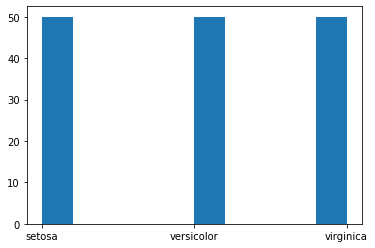

In [4]:
plt.hist(data["Species"])
plt.show()

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [7]:
data["is_train"] = (np.random.uniform(0,1, len(data)) <= 0.75).astype(int)

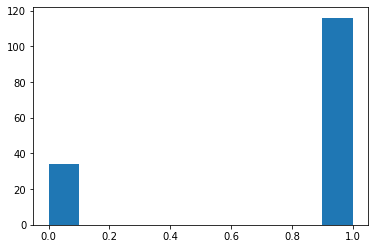

In [8]:
plt.hist(data.is_train)
plt.show()

In [9]:
train, test = data[data["is_train"] == True], data[data["is_train"] == False]

In [10]:
tree = DecisionTreeClassifier(criterion = "entropy", min_samples_split= 20, random_state = 99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [11]:
preds = tree.predict(test[predictors])

In [12]:
pd.crosstab(test[target], preds, rownames = ["Actual"], colnames = ["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,19,0,0
versicolor,0,6,3
virginica,0,0,6


## Visualización del árbol de decisión

In [13]:
with open("../resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

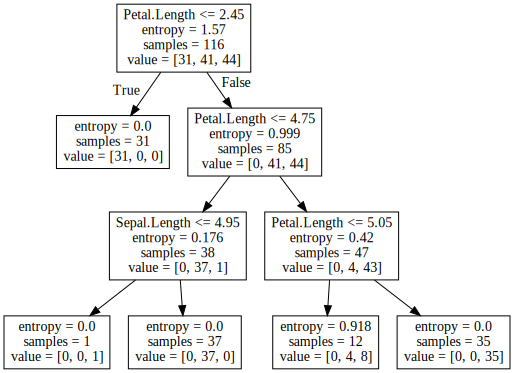

In [16]:
file = open("../resources/iris_dtree.dot", "r")
text = file.read()
Source(text)

## Cross-validation para la poda

In [17]:
X = data[predictors]
Y = data[target]

In [19]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [25]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [27]:
score = np.mean(cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1))

In [164]:
cv_mat = np.array(np.repeat(float(0),10*18)).reshape(10,18)
for j in range (2,20):
    for i in range(1,11):
        tree = DecisionTreeClassifier(criterion = "entropy", max_depth=i, min_samples_split=j, random_state=99)
        tree.fit(X, Y)
        cv = KFold(n_splits=10, shuffle=True, random_state=1)
        score = np.mean(cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1))
        cv_mat[i-1,j-2] = score
    print("\nNúmero de observaciones mínimas:",j)
    for i in range(1,11):
        if i == np.argmax(cv_mat[:,j-2]) + 1:
            print("Mejor profundidad: ", i, ". Score: ", round(cv_mat[i-1,j-2],4), sep="")


Número de observaciones mínimas: 2
Mejor profundidad: 3. Score: 0.94

Número de observaciones mínimas: 3
Mejor profundidad: 3. Score: 0.94

Número de observaciones mínimas: 4
Mejor profundidad: 3. Score: 0.94

Número de observaciones mínimas: 5
Mejor profundidad: 3. Score: 0.94

Número de observaciones mínimas: 6
Mejor profundidad: 3. Score: 0.94

Número de observaciones mínimas: 7
Mejor profundidad: 3. Score: 0.94

Número de observaciones mínimas: 8
Mejor profundidad: 3. Score: 0.94

Número de observaciones mínimas: 9
Mejor profundidad: 3. Score: 0.94

Número de observaciones mínimas: 10
Mejor profundidad: 3. Score: 0.94

Número de observaciones mínimas: 11
Mejor profundidad: 3. Score: 0.94

Número de observaciones mínimas: 12
Mejor profundidad: 3. Score: 0.94

Número de observaciones mínimas: 13
Mejor profundidad: 3. Score: 0.94

Número de observaciones mínimas: 14
Mejor profundidad: 3. Score: 0.94

Número de observaciones mínimas: 15
Mejor profundidad: 3. Score: 0.94

Número de obs